# pylimons: Python Linac MOdeling aNd Simulation

## Utils

In [1]:
import utils

In [2]:
utils.c

299792458.0

In [3]:
from utils import physical_constants as pconstants

In [4]:
pconstants.c

299792458.0

In [5]:
pconstants.m_e

0.51099895

## Beam

### Particle Class

In [2]:
from beam import Particle

In [3]:
particle = Particle('electron', 10)

In [4]:
particle.get_gamma()

20.569511835591836

In [5]:
particle.get_momentum()

9.98693546955716

In [6]:
particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [7]:
particle.update_energy(20)

In [8]:
particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 20 MeV
particle momentum : 19.99347093611059 MeV/c
particle gamma    : 40.13902367118367
particle beta     : 0.9996896128022548


### Bunch Class

In [1]:
from beam import Bunch

In [2]:
twiss_x = [-1.5, 10, 10]
twiss_y = [1.5, 10, 10]

#Bunch(sepcies, energy, dimension, num_particles, twiss_x, twiss_y)

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [3]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [4]:
bunch.particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [5]:
bunch.print_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 10 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 10 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312


In [6]:
x = particles[0,:]
xp = particles[1,:]

In [7]:
from matplotlib import pyplot as plt

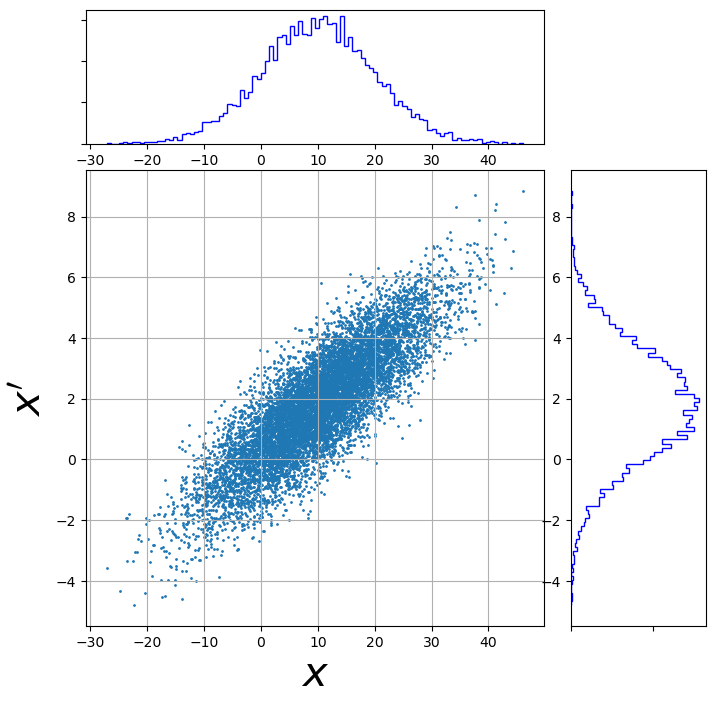

In [8]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

## Elements